In [36]:
import xarray as xr
import numpy as np
import glob
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from xarray import DataArray
import pandas as pd
# from PyEMD import EEMD
import pylab as plt
from numpy import diff

In [37]:
lat_min, lat_max = (60,76) # Norwegian Sea
lon_min, lon_max = (0,20)
# read heat flux; unit: w/m**2
data = xr.open_dataset('/work/uo1075/u241321/data/hfds_1970-2019_assi_dt.nc')
var = np.mean(data['__xarray_dataarray_variable__'].sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max)), axis=1)

# weight average 
weights = np.cos(np.deg2rad(var.lat))
weights.name = "weights"
air_weighted = var.weighted(weights)
heat_sum = air_weighted.sum(("lon", "lat"))# unit: w or J/s
heatflux = heat_sum*365*24*3600 # convert unit to J

In [38]:
# read temperature
upper, bottom = (6, 310)
data1       = xr.open_dataset("/work/uo1075/u241321/data/u241321/data_cdo/temperature_1969-2019_assi_dt_5000.nc",decode_times=False)
var1 = np.mean(data1['__xarray_dataarray_variable__'].sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max), depth=slice(upper, bottom)), axis=1)

# read density
data2       = xr.open_dataset("/work/uo1075/u241321/data/rhopoto_1969-2019_assi_absolute.nc",decode_times=False) 
var2 = np.mean(data2['rhopoto'].sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max), depth=slice(upper, bottom)), axis=1)


In [39]:
var2*var1

<xarray.DataArray (time: 50, depth: 15, lat: 16, lon: 20)>
array([[[[ 1.65854507e+02,  6.24244499e+01, -4.97544556e+01, ...,
                      nan, -8.02367126e+02, -7.32653503e+02],
         [ 1.75243469e+02,  1.83209747e+02,  1.22775733e+00, ...,
                      nan, -6.09667175e+02, -3.20357422e+02],
         [ 2.29348740e+02,  2.55683456e+02,  2.70568420e+02, ...,
                      nan,             nan, -2.20052460e+02],
         ...,
         [ 6.44643066e+02,  7.28410217e+02,  8.03140991e+02, ...,
           8.13794556e+02,  9.48774170e+02,  7.95212891e+02],
         [ 4.59459137e+02,  4.82884430e+02,  5.01338928e+02, ...,
           7.76970947e+02,  8.72778870e+02,  9.84156189e+02],
         [-1.73935852e+02, -1.45418900e+02, -1.48040451e+02, ...,
           5.94866821e+02,  6.80343506e+02,  7.60082764e+02]],

        [[ 1.34081665e+02,  1.27691345e+02, -6.40109587e+00, ...,
                      nan, -8.57653015e+02, -7.79664673e+02],
         [ 1.29992676e+02,  1.51303589e+02, -1.66572361e+01, ...,
                      nan, -6.85057007e+02, -3.04017517e+02],
         [ 1.88867615e+02,  2.16832169e+02,  2.33220322e+02, ...,
                      nan,             nan, -3.70828278e+02],
...
           8.48003159e+01, -2.09004803e+01, -2.03080368e+02],
         [ 4.75604889e+02,  6.31366699e+02,  8.04903015e+02, ...,
                      nan,             nan,             nan],
         [ 5.56740662e+02,  8.45028198e+02,  1.03794177e+03, ...,
                      nan,             nan,             nan]],

        [[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [ 5.23518921e+02,  4.38063629e+02,  1.62154999e+02, ...,
                      nan,             nan,             nan],
         ...,
         [ 4.70597076e+02,  5.80596069e+02,  7.02823975e+02, ...,
                      nan,             nan,             nan],
         [ 4.36815765e+02,  5.52160461e+02,  6.83552612e+02, ...,
                      nan,             nan,             nan],
         [ 5.76553040e+02,  8.48340210e+02,  1.01819849e+03, ...,
                      nan,             nan,             nan]]]],
      dtype=float32)
Coordinates:
  * time     (time) float64 1.092e+05 1.179e+05 ... 5.299e+05 5.387e+05
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 5.5 ... 15.5 16.5 17.5 18.5 19.5
  * lat      (lat) float64 60.5 61.5 62.5 63.5 64.5 ... 71.5 72.5 73.5 74.5 75.5
  * depth    (depth) float64 6.0 17.0 27.0 37.0 47.0 ... 182.5 220.0 262.5 310.0

In [40]:
var1_weighted = var1.weighted(weights)
var2_weighted = var2.weighted(weights)
cp=4000 # J/(kg C)   specific heat capacity of seawater, assue it's constant 
heat = var1_weighted.obj*var2_weighted.obj*cp
# integrate horizontally 
heat_h = heat.sum(("lon", "lat"))

In [41]:
depth1 = np.zeros((depth.size))
depth1[0] = 0
depth1[1:15] = depth [0:14]
thickness = depth - depth1

In [45]:
# integrate vertically : * vertical thickness
heat_sum = np.sum(heat_h*thickness, axis=1)
# heat_h*thickness.sum('depth')
heat_sum  # This is heat content
# Tendency of heat content,  namely, using year to year difference
dx = 1
y = heat_sum
dy = diff(y)/dx

In [43]:
heatflux.shape
dy.shape

(49,)

/tmp/ipykernel_709863/1957144442.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x, dy, '-', linestyle='solid', color='black', linewidth=5, markersize=10, label = 'Tendency of OHT')
/tmp/ipykernel_709863/1957144442.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x, heatflux[0:49], '-', linestyle='solid', color='red', linewidth=5, markersize=10, label = 'Heat flux')


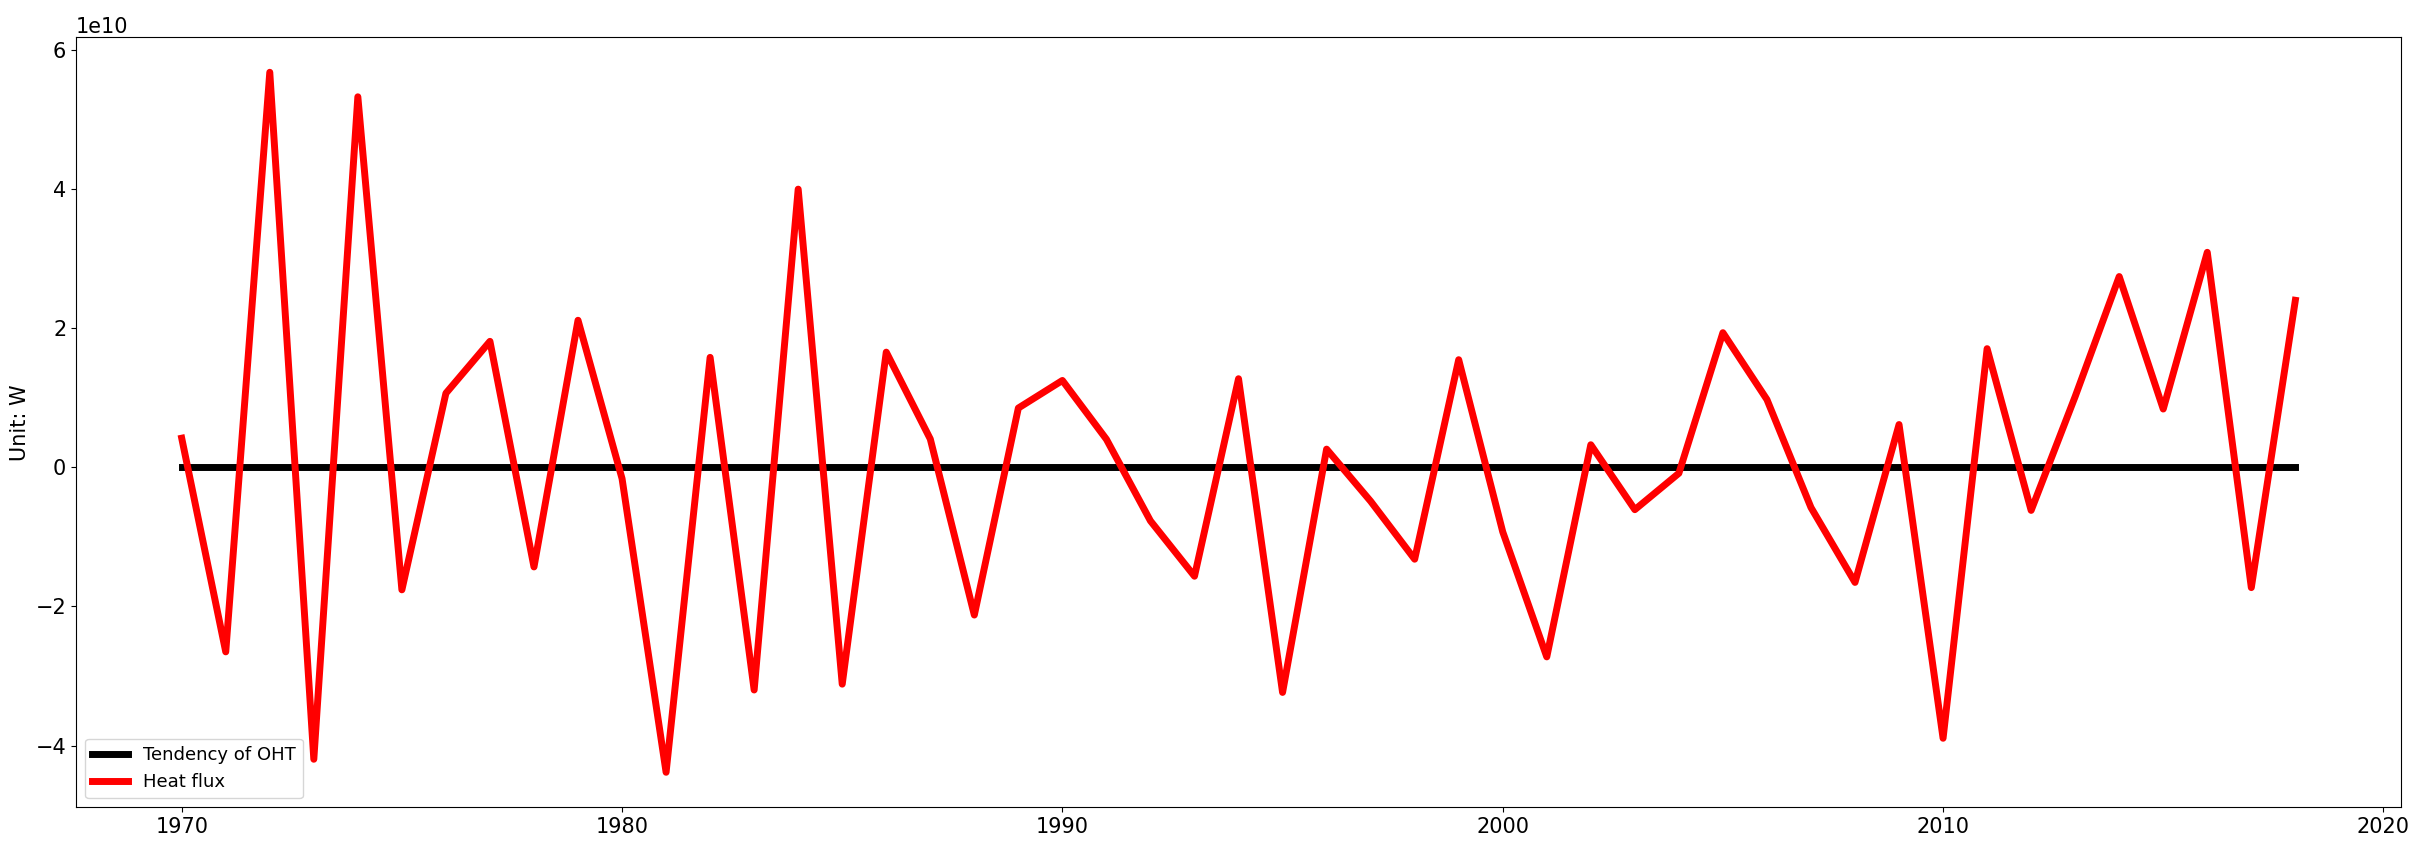

In [46]:
x = np.arange(1970,2019,1)  # starting from difference between 1971 and 1970

fig, ax = plt.subplots(figsize = [30,10])
ax.plot(x, dy, '-', linestyle='solid', color='black', linewidth=5, markersize=10, label = 'Tendency of OHT')
ax.plot(x, heatflux[0:49], '-', linestyle='solid', color='red', linewidth=5, markersize=10, label = 'Heat flux')
# ax.plot(x, ocean, '-', linestyle='solid', color='blue', linewidth=5, markersize=10, label = 'Ocean supply')
ax.legend(loc='lower left', fontsize='13')
ax.set(xlabel='', ylabel='Unit: W',
       title=' ')

plt.rcParams["font.size"] = "15"
plt.show()
# fig.savefig('/work/uo1075/u241321/results/transport_decomposition.pdf')

In [47]:
np.corrcoef(dy, heatflux[0:49])[0,1]

0.13845999772762993

In [48]:
np.corrcoef(dy, ocean)[0,1]

0.8763510231887033

In [49]:
heat_budget = np.zeros((3,49))  #  raw input data;  c1-c4
heat_budget [0,:] = dy
heat_budget [1,:] = heatflux[0:49]
heat_budget [2,:] = ocean
np.save("/work/uo1075/u241321/data/heat_budget_Norw", heat_budget)



In [14]:
#. check whether the amplitute of horizontally averaged heat flux is correct
heat_mean = air_weighted.mean(("lon", "lat"))# unit: W/m^2

/tmp/ipykernel_709863/3991788121.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x, heat_mean, '-', linestyle='solid', color='red', linewidth=5, markersize=10, label = 'Heat flux')


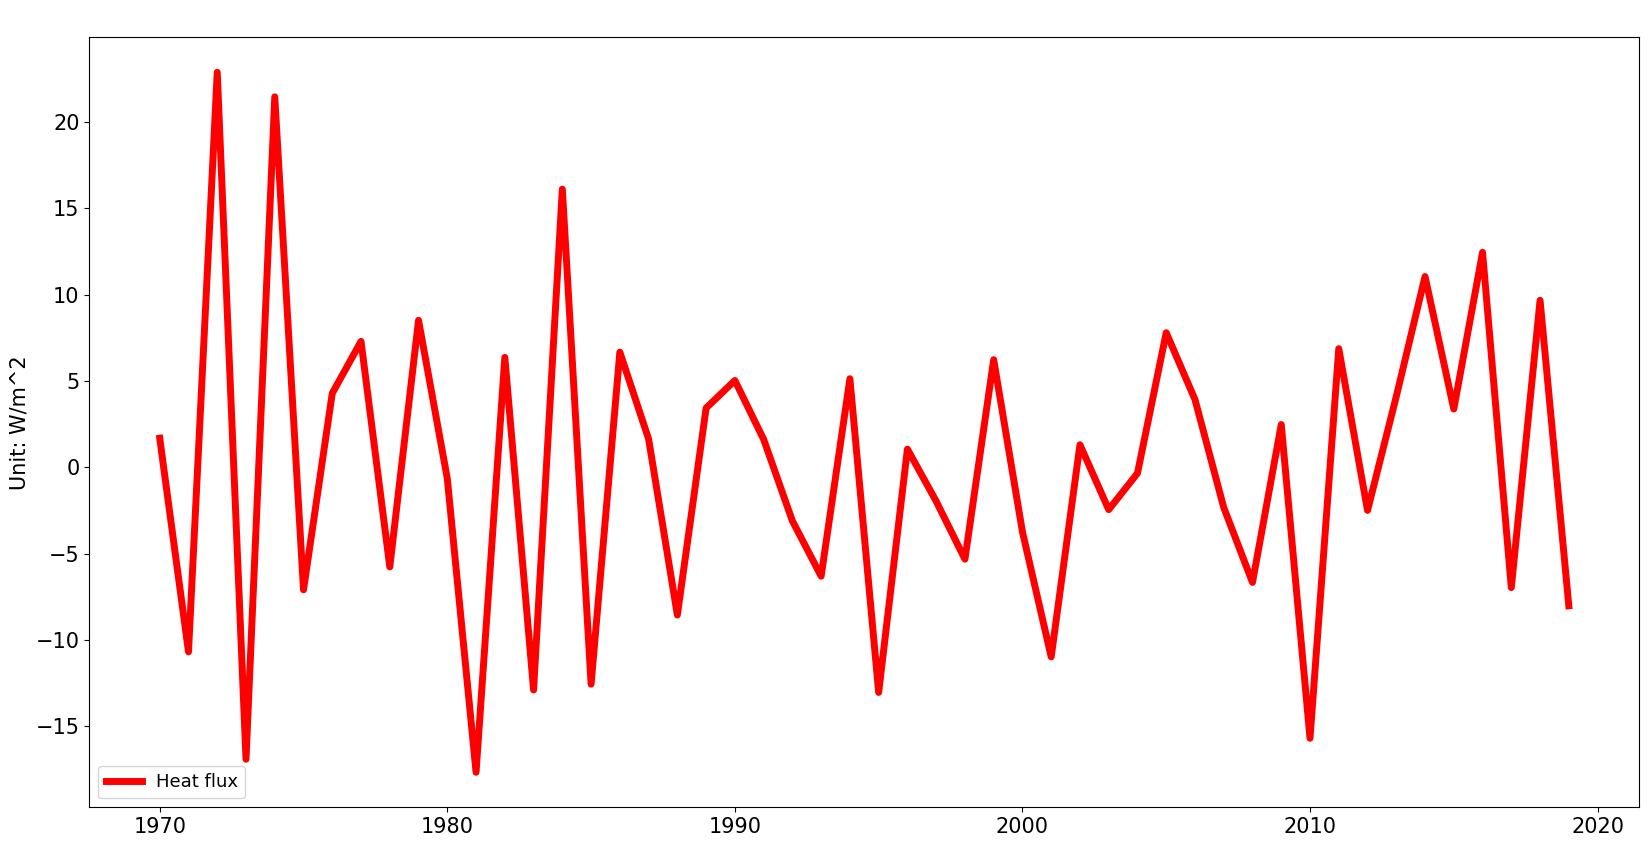

In [16]:
x = np.arange(1970,2020,1)  # 

fig, ax = plt.subplots(figsize = [20,10])
# ax.plot(x, dy, '-', linestyle='solid', color='black', linewidth=5, markersize=10, label = 'Tendency of OHT')
ax.plot(x, heat_mean, '-', linestyle='solid', color='red', linewidth=5, markersize=10, label = 'Heat flux')
# ax.plot(x, ocean, '-', linestyle='solid', color='blue', linewidth=5, markersize=10, label = 'Ocean supply')
ax.legend(loc='lower left', fontsize='13')
ax.set(xlabel='', ylabel='Unit: W/m^2',
       title=' ')

plt.rcParams["font.size"] = "15"
plt.show()
# fig.savefig('/work/uo1075/u241321/results/transport_decomposition.pdf')

/tmp/ipykernel_709863/2958680144.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x, heat_sum, '-', linestyle='solid', color='black', linewidth=5, markersize=10, label = 'Heat content anomlies')


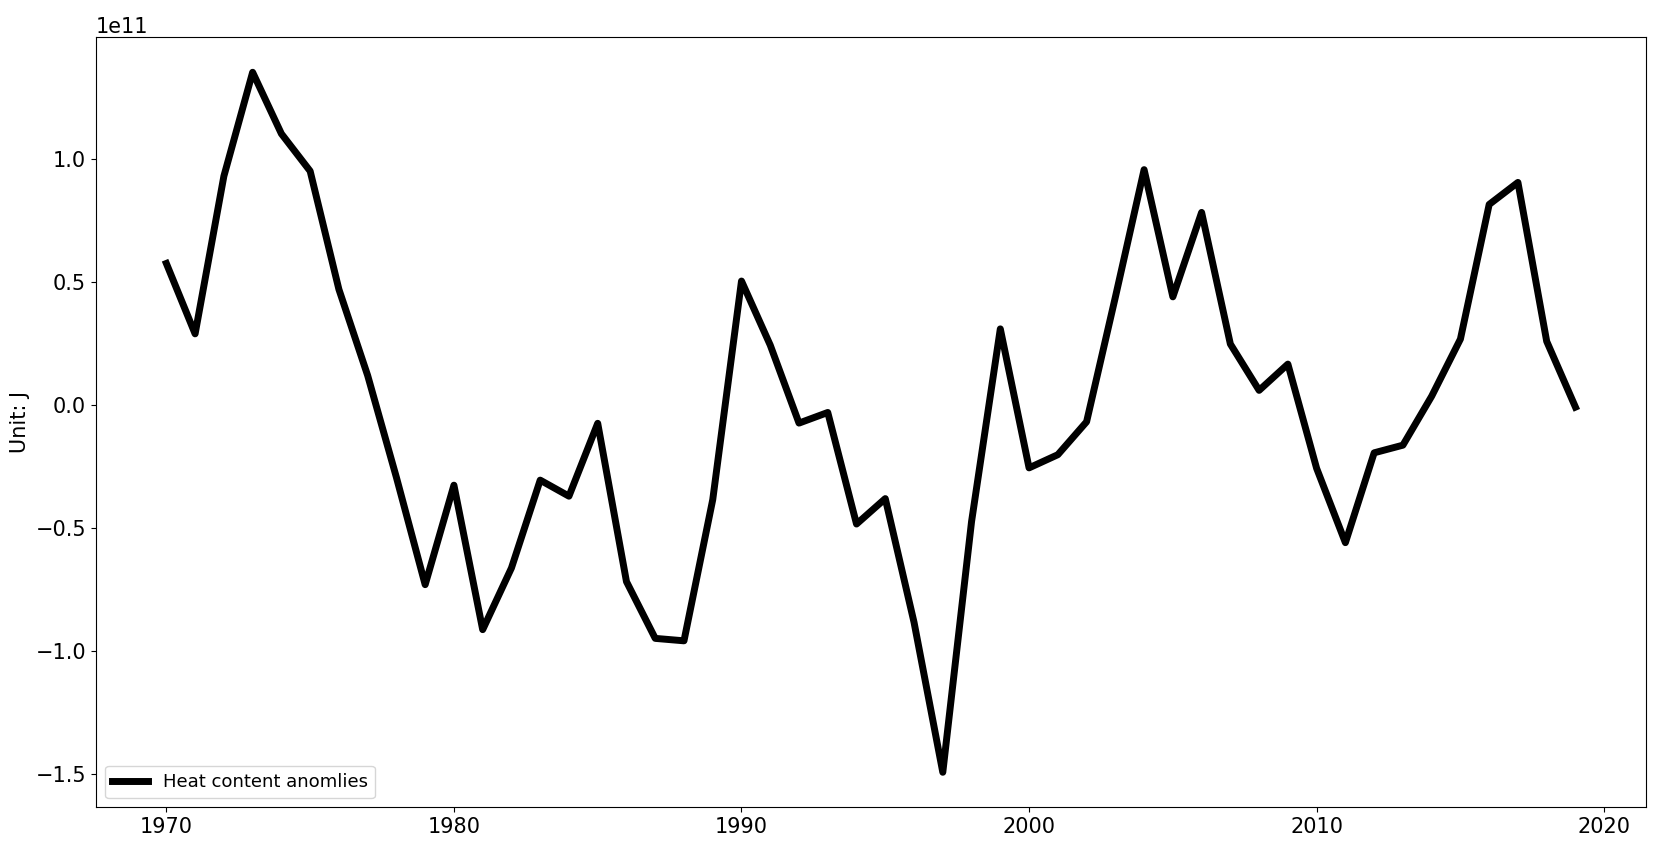

In [19]:
# check whether the amplitute of heat content anomlies is correct


x = np.arange(1970,2020,1)  # 

fig, ax = plt.subplots(figsize = [20,10])
# ax.plot(x, dy, '-', linestyle='solid', color='black', linewidth=5, markersize=10, label = 'Tendency of OHT')
ax.plot(x, heat_sum, '-', linestyle='solid', color='black', linewidth=5, markersize=10, label = 'Heat content anomlies')
# ax.plot(x, ocean, '-', linestyle='solid', color='blue', linewidth=5, markersize=10, label = 'Ocean supply')
ax.legend(loc='lower left', fontsize='13')
ax.set(xlabel='', ylabel='Unit: J',
       title=' ')

plt.rcParams["font.size"] = "15"
plt.show()
# fig.savefig('/work/uo1075/u241321/results/transport_decomposition.pdf')

/tmp/ipykernel_709863/1840452575.py:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x, heat_sum1, '-', linestyle='solid', color='black', linewidth=5, markersize=10, label = 'Heat content anomlies')


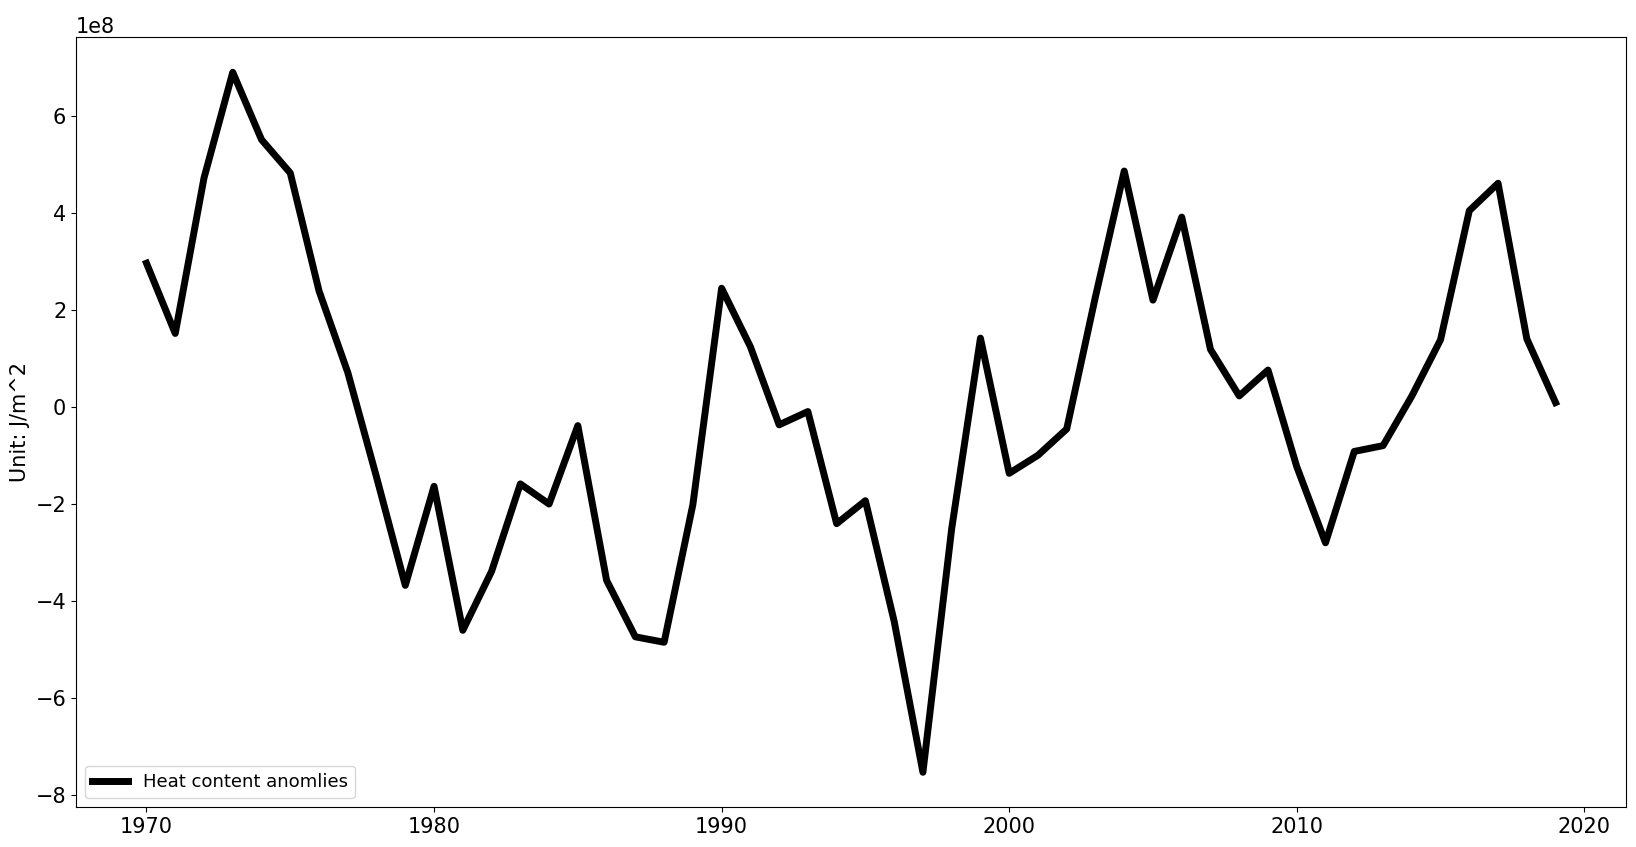

In [21]:
# check whether the amplitute of horizontally averaged heat content anomlies is correct

# integrate horizontally 
heat_h1 = heat.mean(("lon", "lat"))
# integrate vertically : * vertical thickness
heat_sum1 = np.sum(heat_h1*thickness, axis=1)

x = np.arange(1970,2020,1)  # 

fig, ax = plt.subplots(figsize = [20,10])
# ax.plot(x, dy, '-', linestyle='solid', color='black', linewidth=5, markersize=10, label = 'Tendency of OHT')
ax.plot(x, heat_sum1, '-', linestyle='solid', color='black', linewidth=5, markersize=10, label = 'Heat content anomlies')
# ax.plot(x, ocean, '-', linestyle='solid', color='blue', linewidth=5, markersize=10, label = 'Ocean supply')
ax.legend(loc='lower left', fontsize='13')
ax.set(xlabel='', ylabel='Unit: J/m^2',
       title=' ')

plt.rcParams["font.size"] = "15"
plt.show()
# fig.savefig('/work/uo1075/u241321/results/transport_decomposition.pdf')

/tmp/ipykernel_709863/3665832010.py:19: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x, dy, '-', linestyle='solid', color='black', linewidth=5, markersize=10, label = 'Tendency of OHT')
/tmp/ipykernel_709863/3665832010.py:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x, heat_mean_y[0:49], '-', linestyle='solid', color='red', linewidth=5, markersize=10, label = 'Heat flux')


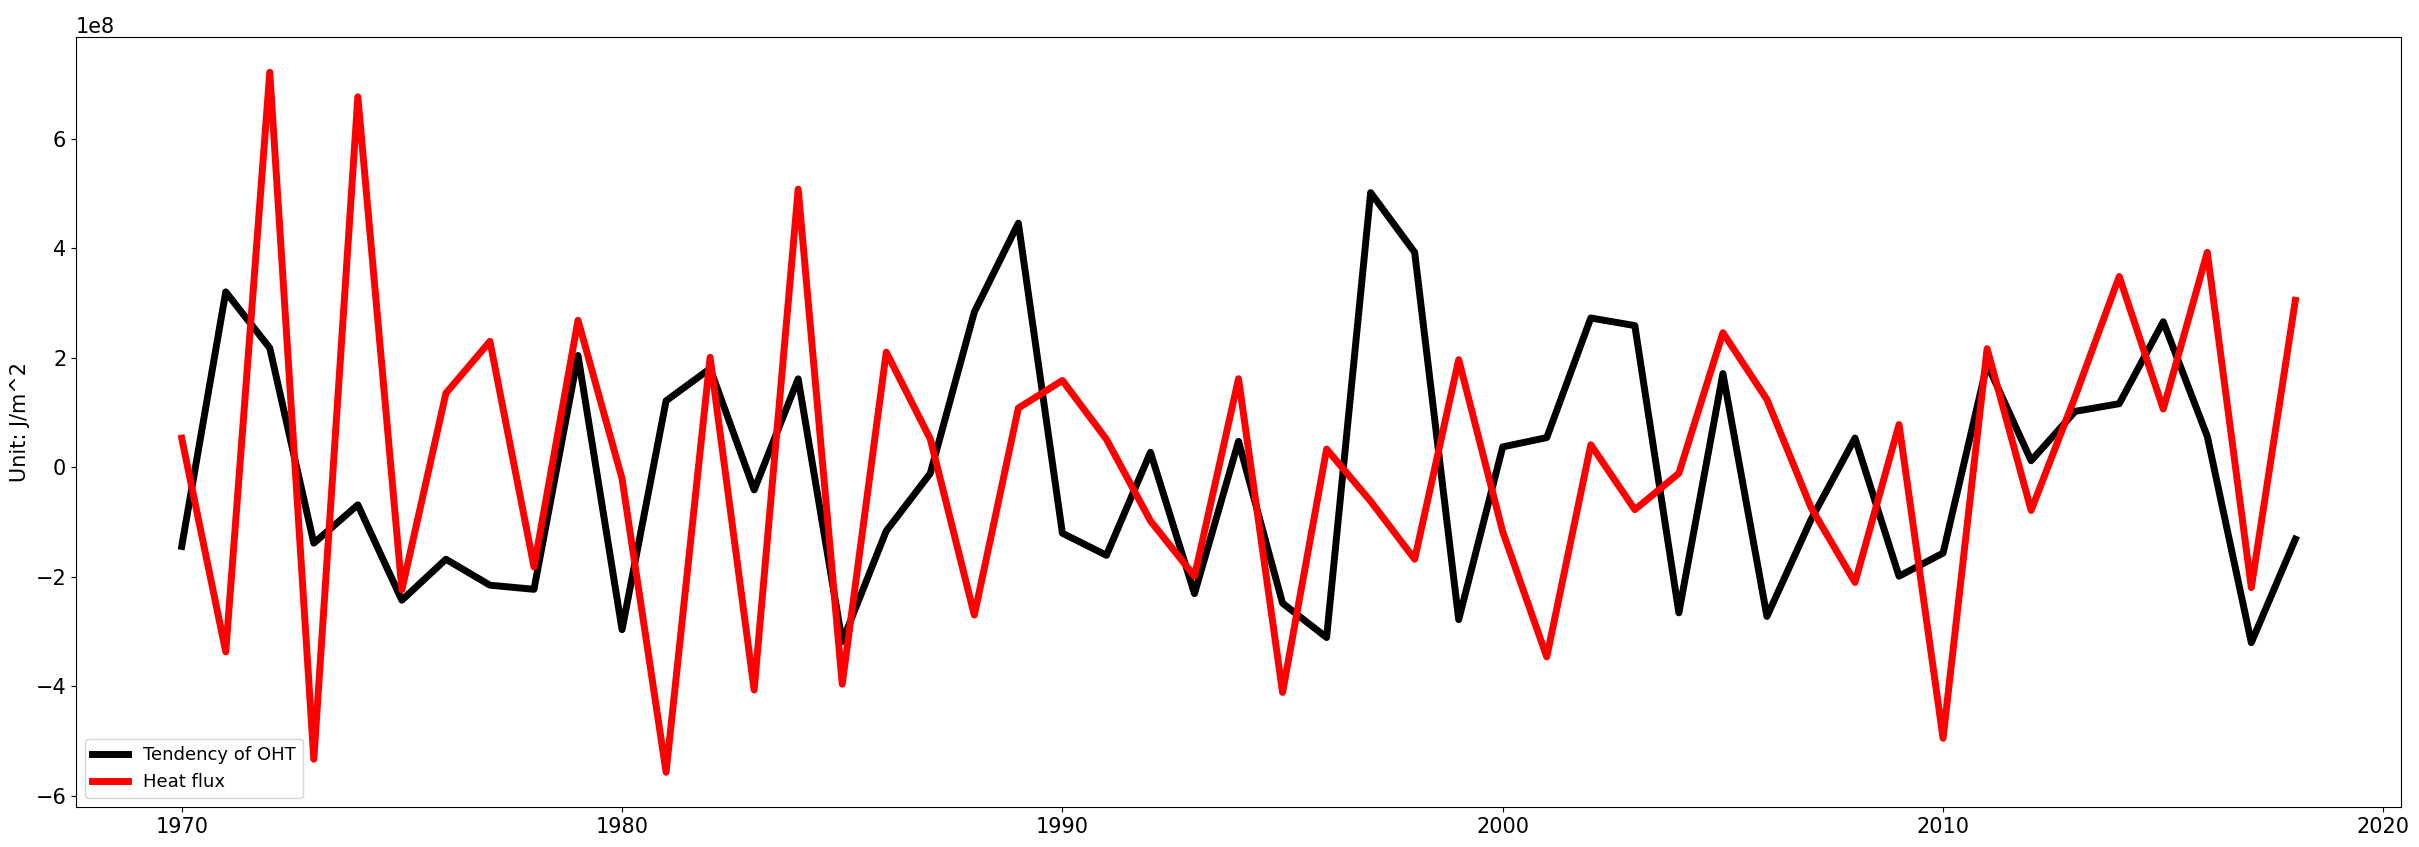

In [30]:
# check whether the amplitute of tendency of horizontally averaged heat content anomlies is correct
# integrate vertically : * vertical thickness

heat_sum1  # This is heat content anomlies, unit: J/m^2
# Tendency of heat content,  namely, using year to year difference
dx = 1
y = heat_sum1
dy = diff(y)/dx  # unit: J/m^2*year

heat_mean # horizontally averaged heat flux, unit: W/m^2 = J/s*m^2
heat_mean_y = heat_mean*365*24*3600 # convert the unit to J/m^2*year
# Ocean contribution
ocean = dy - heat_mean_y[0:49]   # unit: W/m^2


x = np.arange(1970,2019,1)  # starting from difference between 1971 and 1970

fig, ax = plt.subplots(figsize = [30,10])
ax.plot(x, dy, '-', linestyle='solid', color='black', linewidth=5, markersize=10, label = 'Tendency of OHT')
ax.plot(x, heat_mean_y[0:49], '-', linestyle='solid', color='red', linewidth=5, markersize=10, label = 'Heat flux')
# ax.plot(x, ocean, '-', linestyle='solid', color='blue', linewidth=5, markersize=10, label = 'Ocean supply')
ax.legend(loc='lower left', fontsize='13')
ax.set(xlabel='', ylabel='Unit: J/m^2',
       title=' ')

plt.rcParams["font.size"] = "15"
plt.show()
# fig.savefig('/work/uo1075/u241321/results/transport_decomposition.pdf')
